In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('Dataset/RateBeer/reviews.csv')
df.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


In [13]:
df2 = pd.read_csv('Dataset/BeerAdvocate/reviews.csv')
df2.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


In [3]:
# check the shape of the data
df.shape

(7122074, 16)

In [4]:
# Create time column from the unix format for the RateBeer dataset
df['time'] = pd.to_datetime(df['date'], origin='unix', unit='s')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df.head(500)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,time,year,month,day
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",2016-04-26 10:00:00,2016,4,26
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...,2017-02-17 11:00:00,2017,2,17
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni...",2016-06-24 10:00:00,2016,6,24
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C...",2016-01-01 11:00:00,2016,1,1
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...,2015-10-23 10:00:00,2015,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Bullhouse El Capitan,441604,Bullhouse Brewing Company,27006,Imperial Stout,8.0,1473847200,The_Osprey,249130,4,8,4,7,16,3.9,August 2016 - Bottle share at Chrisoâs Sunda...,2016-09-14 10:00:00,2016,9,14
496,Bullhouse El Capitan,441604,Bullhouse Brewing Company,27006,Imperial Stout,8.0,1471773600,rlgk,7982,4,7,4,7,14,3.6,"Chris and Ruthâs Shindig 2016, Sunday. Black...",2016-08-21 10:00:00,2016,8,21
497,Bullhouse El Capitan,441604,Bullhouse Brewing Company,27006,Imperial Stout,8.0,1471082400,Beerhunter111,227834,3,7,4,7,15,3.6,Pre-gbbf-shinding. TrÃ¼bes dunkel orange braun...,2016-08-13 10:00:00,2016,8,13
498,Bullhouse Milky Whey,493944,Bullhouse Brewing Company,27006,Imperial Stout,10.0,1489316400,Beersiveknown,128086,4,7,4,8,16,3.9,"bottle at home from emersons,armaghOpaque choc...",2017-03-12 11:00:00,2017,3,12


In [14]:
# Create time column from the unix format for the BeerAdvocate dataset
df2['time'] = pd.to_datetime(df2['date'], origin='unix', unit='s')
df2['year'] = df2['time'].dt.year
df2['month'] = df2['time'].dt.month
df2['day'] = df2['time'].dt.day
df2.head(500)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,time,year,month,day
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,"From a bottle, pours a piss yellow color with ...",2015-08-20 10:00:00,2015,8,20
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.50,3.67,Pours pale copper with a thin head that quickl...,2009-02-20 11:00:00,2009,2,20
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.50,3.73,"500ml Bottle bought from The Vintage, Antrim.....",2006-03-13 11:00:00,2006,3,13
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.50,3.98,Serving: 500ml brown bottlePour: Good head wit...,2004-12-01 11:00:00,2004,12,1
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.00,4.00,"500ml bottlePours with a light, slightly hazy ...",2004-08-30 10:00:00,2004,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Golden,69185,The Celt Experience,20776,English Pale Ale,4.2,1387882800,GarthT,gartht.763338,3.00,3.50,3.00,3.00,3.25,3.17,Amber in the glass.Strong aroma of apricot and...,2013-12-24 11:00:00,2013,12,24
496,Golden,69185,The Celt Experience,20776,English Pale Ale,4.2,1385895600,LeeroyAgogo,leeroyagogo.766475,3.50,3.25,4.00,3.75,4.00,3.69,"Wow, what a beer. Great clear amber colour wit...",2013-12-01 11:00:00,2013,12,1
497,Golden,69185,The Celt Experience,20776,English Pale Ale,4.2,1383908400,magpieken,magpieken.727658,4.25,4.25,4.25,4.25,4.25,4.25,500ml bottle. Best Before 24.09.2015. Slightly...,2013-11-08 11:00:00,2013,11,8
498,Golden,69185,The Celt Experience,20776,English Pale Ale,4.2,1383476400,puboflyons,puboflyons.237852,3.00,3.50,3.50,3.25,3.25,3.32,From the 25 fl. oz. bottle stamped 30-09-2013....,2013-11-03 11:00:00,2013,11,3


In [5]:
# Analyse the rating from the reviews with the years column
test = df.copy()
test = test.groupby('year')['rating'].mean()
test.head(500)

year
2000    3.255234
2001    3.108195
2002    3.090482
2003    3.110110
2004    3.128160
2005    3.122454
2006    3.146294
2007    3.172006
2008    3.198982
2009    3.229747
2010    3.271343
2011    3.261058
2012    3.289253
2013    3.326371
2014    3.325964
2015    3.347425
2016    3.380850
2017    3.406064
Name: rating, dtype: float64

In [6]:
# Analysis using time and rating per beer style
test2 = df.copy()
test2 = test2.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])
test2.head(500)

mean  count
style         year month                 
Abbey Dubbel  2000 5      3.600000      1
                   6      3.800000      1
                   8      3.833333      3
                   9      3.933333      3
                   10     3.925000     12
...                            ...    ...
Abt/Quadrupel 2007 8      3.910638    329
                   9      3.903533    368
                   10     3.885752    379
                   11     3.838872    337
                   12     3.971688    385

[500 rows x 2 columns]

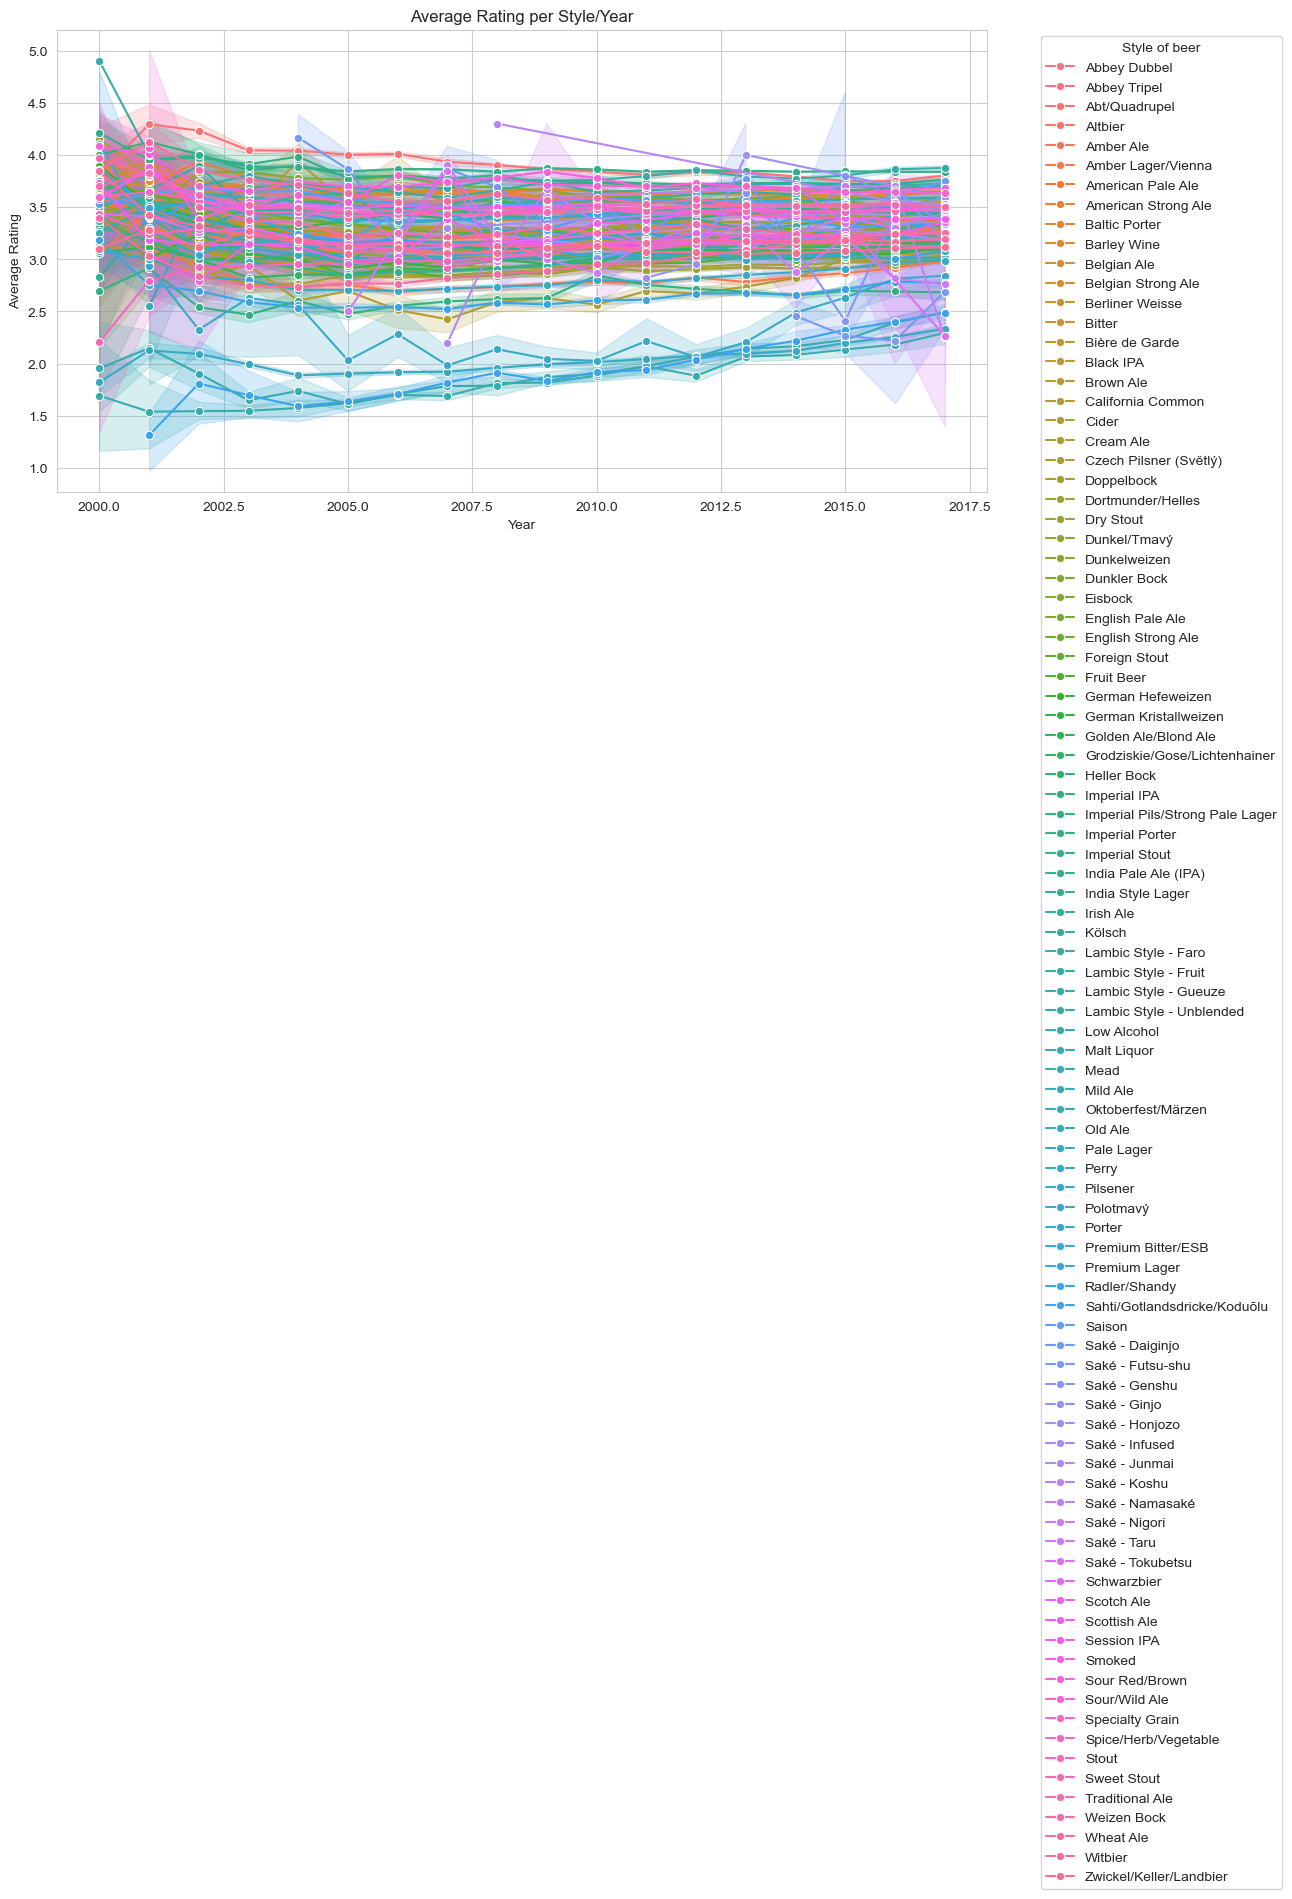

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=test2, x='year', y='mean', hue='style', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [20]:
# check which columns between aroma, palate, taste, appearance are the most important
import statsmodels.formula.api as smf
test3 = df.copy()
test3 = test3.dropna()
test3['binary_rating'] = (test3['rating'] >= 3).astype(int)

log = smf.logit(formula='binary_rating ~ aroma + palate + taste + appearance + year', data=test3)
log = log.fit()
propensity = log.predict()
test3['Propensity_score'] = propensity
print(test3['Propensity_score'])
print(log.summary())

Optimization terminated successfully.
         Current function value: 0.120854
         Iterations 14
0          3.079492e-05
1          5.935461e-06
2          1.795111e-06
3          7.645680e-08
4          3.070174e-05
               ...     
7122060    1.142990e-04
7122061    2.478921e-06
7122062    5.416125e-09
7122063    3.886591e-09
7122064    4.784641e-08
Name: Propensity_score, Length: 6946644, dtype: float64
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              6946644
Model:                          Logit   Df Residuals:                  6946638
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                  0.7821
Time:                        15:57:10   Log-Likelihood:            -8.3953e+05
converged:                       True   LL-Null:                   -3.8536e+06
Covariance Type:        

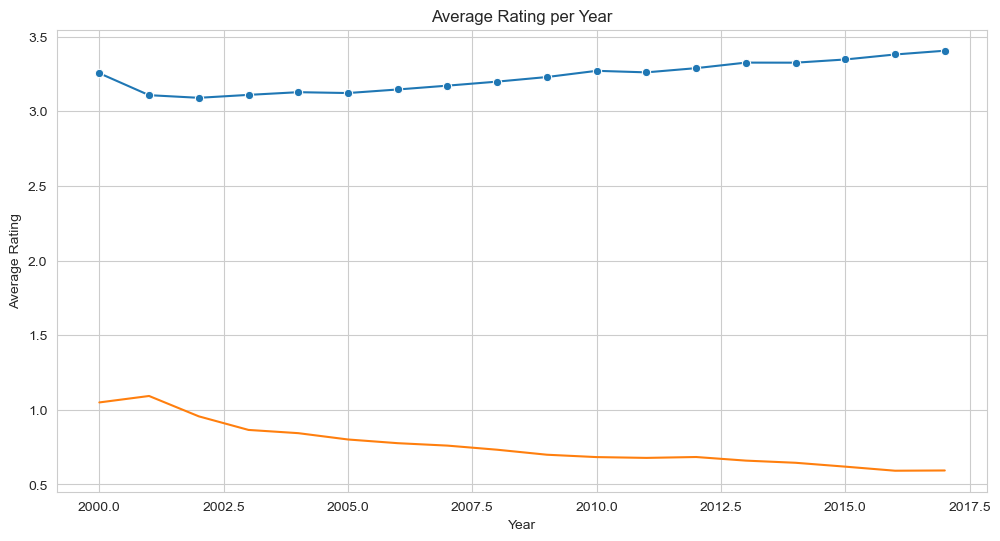

In [30]:
# TODO create an error bar

# Compare the average rating per year for all beer
test4 = df.groupby('year')['rating'].mean().reset_index()
std = df.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=test4, x='year', y='rating', marker='o')
sns.lineplot(data=std, x='year', y='rating')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

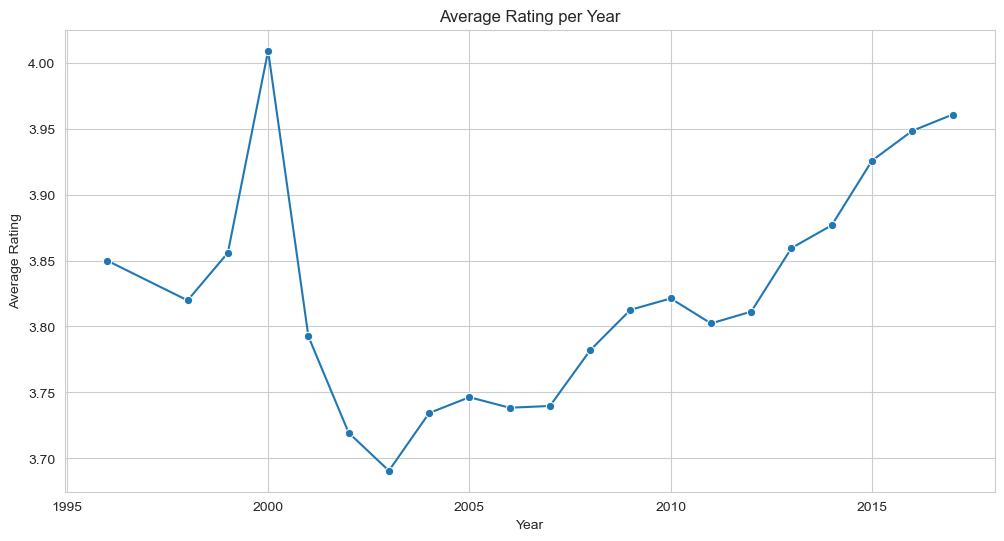

In [17]:
# Compare the average rating per year for all beer
test4 = df2.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=test4, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()